# Exploratory Data Analysis of Haberman's Survival Data Set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file=pd.read_csv("haberman.csv")
file[0:4]
#file is the variable, storing data of CSV file

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1


In [6]:
print(file.shape)

(305, 4)


In [5]:
print(file.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [28]:
colname=['p_age', 'op_year', 'no_pos_ax_nodes', 'surv_stat']
file=pd.read_csv("haberman.csv", names=colname, header=None)
file[:5]

,p_age,op_year,no_pos_ax_nodes,surv_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
file['surv_stat'] = file['surv_stat'].map({1:"yes", 2:"no"})
file['surv_stat'] = file['surv_stat'].astype('category')
print(file.tail())

     p_age  op_year  no_pos_ax_nodes surv_stat
301     75       62                1       yes
302     76       67                0       yes
303     77       65                3       yes
304     78       65                1        no
305     83       58                2        no


In [31]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
p_age              306 non-null int64
op_year            306 non-null int64
no_pos_ax_nodes    306 non-null int64
surv_stat          306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [7]:
file["surv_stat"].value_counts()

1    225
2     81
Name: surv_stat, dtype: int64

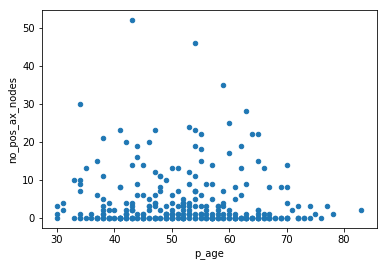

In [4]:
file.plot(kind='scatter', x='p_age', y='no_pos_ax_nodes') ;
plt.show()

# observation 1 :
in any age group there are only few patients who have damaged auxiliary nodes greater than 30.

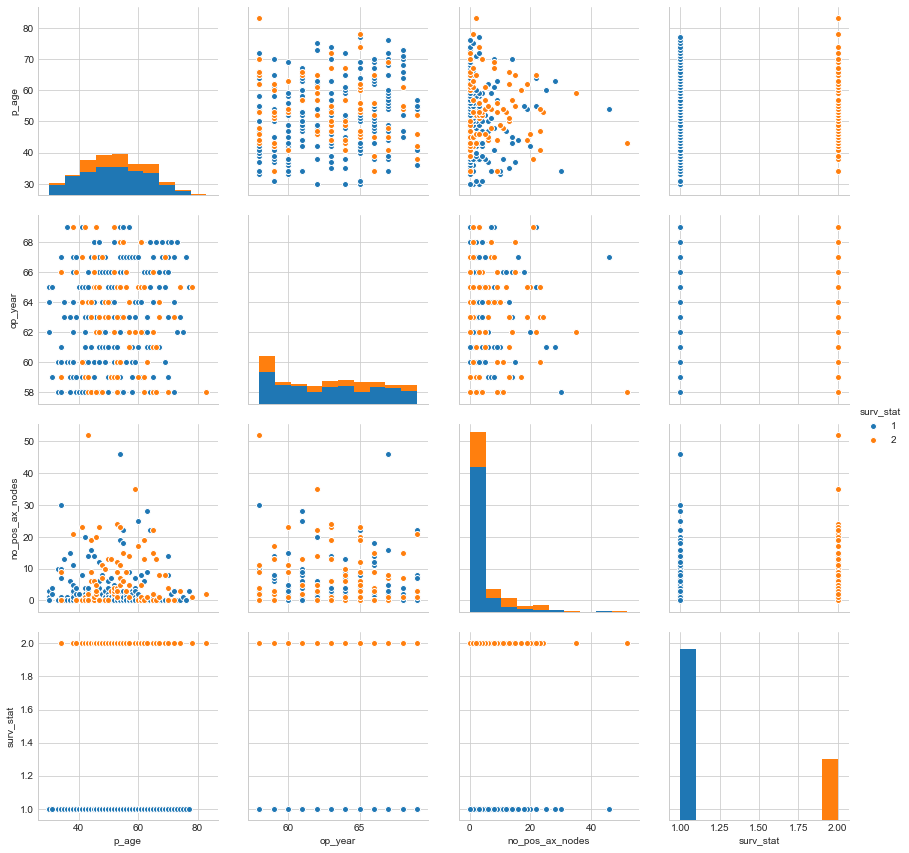

In [8]:
sns.set_style("whitegrid")
sns.pairplot(file, hue="surv_stat", size=3)
plt.show()

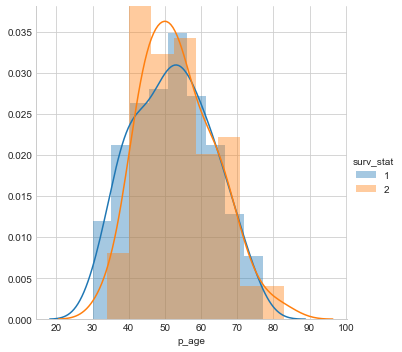

In [11]:
sns.FacetGrid(file, hue="surv_stat", size=5)\
   .map(sns.distplot,"p_age")\
   .add_legend()
plt.show()

# OBSERVATION 2 :
Age group of 42-56 have less survival chances than other age group.

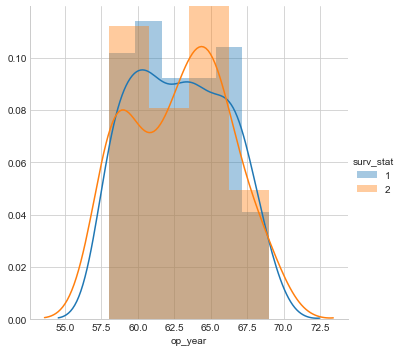

In [12]:
sns.FacetGrid(file, hue="surv_stat", size=5)\
   .map(sns.distplot, "op_year")\
   .add_legend()
plt.show()

# OBSERVATION 3 :
Operation year from 58.5 to 62.75 their is more survival chance and Operation Year from 62.75 to 66 there are less chances of survival.

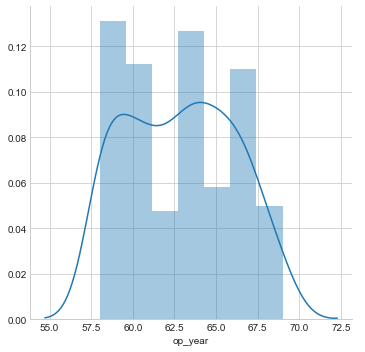

In [9]:
sns.FacetGrid(file, size=5)\
   .map(sns.distplot, "op_year")\
   .add_legend()
plt.show()

[0.29738562 0.16013072 0.19934641 0.18300654 0.16013072]
[58.  60.2 62.4 64.6 66.8 69. ]


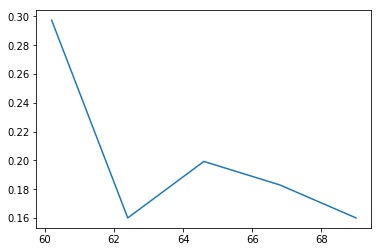

In [47]:
counts, bin_edges = np.histogram(file['op_year'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#cdf = np.cumsum(pdf)
#plt.legend("1")
plt.plot(bin_edges[1:],pdf)

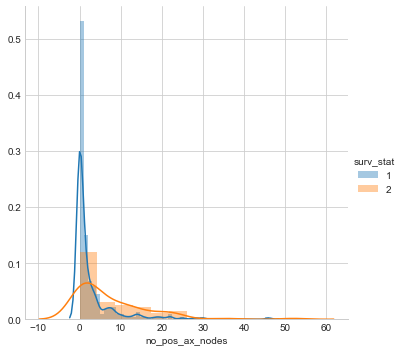

In [10]:
sns.FacetGrid(file, hue="surv_stat", size=5)\
   .map(sns.distplot, "no_pos_ax_nodes")\
   .add_legend()
plt.show()

# OBSERVATION 4 :
#we can make model by above PDF as from 0 to approx 5 the survival have great chance and after
the survival chance is less. We can say that if there is more no of positive axiliary nodes the survival chance is less.

In [33]:
file_1 = file.loc[file["surv_stat"] == "yes"];
file_2 = file.loc[file["surv_stat"] == "no"];
#file_1 is storing all those data which have survival status=1
#file_2 is storing all those data which have survival status=2

In [41]:
file_11=file_1['no_pos_ax_nodes']
file_22=file_2.no_pos_ax_nodes
#file_11 is saving all the data set of positive axiliary nodes with 1 as survival status
#file_22 is saving all the data set of positive axiliary nodes with 2 as survival status

In [45]:
#file_11.describe()
print(np.median(file_11))
print(np.median(file_22))

0.0
4.0


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5,0,'no_pos_ax_nodes')

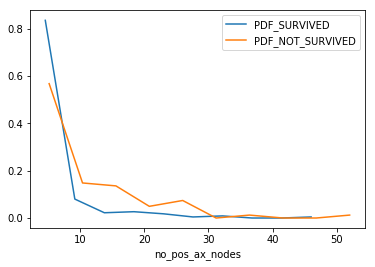

In [18]:
#below is the code for pdf and cdf of positive axiliary columns for those whose surv_stat=1 

counts, bin_edges = np.histogram(file_1['no_pos_ax_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.legend("1")
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:], cdf)
#plt.legend(['PDF_YES','CDF_YES'])

#below is the code for pdf and cdf of positive axiliary columns for those whose surv_stat=2

counts, bin_edges = np.histogram(file_2['no_pos_ax_nodes'], bins=10, 
                                 density = True)
pdf_2 = counts/(sum(counts))
print(pdf_2);
print(bin_edges)
cdf_2 = np.cumsum(pdf_2)
plt.legend("1")
plt.plot(bin_edges[1:],pdf_2)
#plt.plot(bin_edges[1:], cdf_2)
#plt.legend(['PDF_YES','CDF_YES','PDF_NO','CDF_NO'])
plt.legend(['PDF_SURVIVED','PDF_NOT_SURVIVED'])
plt.xlabel("no_pos_ax_nodes")

# OBSERVATION
#If no of positive axiliary nodes is greater than 46 then their is surity of DEATH. But also after 5 or 6 axiliary nodes the chances of DEATH is more compared to chances of life.

In [31]:
file.shape

(305, 4)

In [32]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
